In [4]:
import pandas as pd
from data_pipeline.dataset import Dataset

In [5]:
df = pd.read_feather("../../data/parquet_files/train/processed_train.feather")
df.head()

,case_id,target,numberofcontrsvalue_358L_max,nominalrate_281L_min,classificationofcontr_400M_mode,totaldebtoverduevalue_178A_max,collater_valueofguarantee_876L_mean,pmts_overdue_1140A_max,credacc_cards_status_52L_mode,credacc_cards_status_52L_last,last180dayaveragebalance_704A_last,last180dayaveragebalance_704A_mean,last180dayaveragebalance_704A_max
0,0,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
1,1,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
2,2,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
3,3,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
4,4,1,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN


In [6]:
from hydra.utils import instantiate
from hydra import compose, initialize
from hydra.core.global_hydra import GlobalHydra
from data_pipeline.pipelinesteps import data_splitter


GlobalHydra.instance().clear()
initialize(config_path="../../", version_base=None)
cfg = compose(config_name="config")

data_pipeline = instantiate(cfg.data_pipeline)
df = pd.read_feather("../../data/parquet_files/train/processed_train.feather")
df = data_pipeline.apply(df)

dataset = Dataset(data=df, data_splitter=data_splitter, target_column='target')



In [7]:
dataset.X.head()

,case_id,numberofcontrsvalue_358L_max,nominalrate_281L_min,totaldebtoverduevalue_178A_max,collater_valueofguarantee_876L_mean,pmts_overdue_1140A_max,last180dayaveragebalance_704A_last,last180dayaveragebalance_704A_mean,last180dayaveragebalance_704A_max,credacc_cards_status_52L_mode_ACTIVE,...,classificationofcontr_400M_mode_f0517bc9,classificationofcontr_400M_mode_f0a30139,classificationofcontr_400M_mode_f423c437,classificationofcontr_400M_mode_f6c40125,classificationofcontr_400M_mode_f920c170,classificationofcontr_400M_mode_f9af1105,classificationofcontr_400M_mode_fa2a66b3,classificationofcontr_400M_mode_fb8921dc,classificationofcontr_400M_mode_fb98f5e4,classificationofcontr_400M_mode_fd17005c
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load a binary classification dataset



# Split the data into training and test sets
X_train, X_test, y_train, y_test = dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test 

# Train a HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score: {auc_score}")

AUC score: 0.6975305152556256


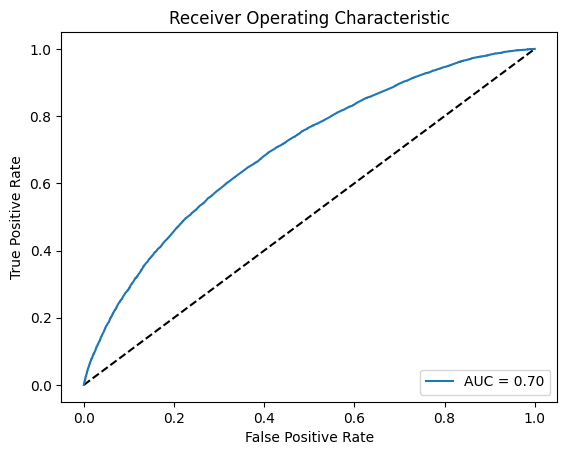

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# Plot the AUC score
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
